![logo](../../../LogoLine_horizon_C3S.png)

# Uncertainty in projected changes of energy consumption in Europe

Production date: 23-05-2024

Produced by: CMCC foundation - Euro-Mediterranean Center on Climate Change. Albert Martinez Boti.

## 🌍 Use case: Assessing possible impacts of climate change on energy demand in Europe
## ❓ Quality assessment question
* **What are the projected future changes and associated uncertainties of Energy Degree Days in Europe?**

Sectors affected by climate change are varied including agriculture [[1]](https://doi.org/10.1007/s10113-010-0173-x), forest ecosystems [[2]](https://doi.org/10.1016/j.foreco.2009.09.023), and energy consumption [[3]](https://doi.org/10.1016/j.enbuild.2014.09.052). Under projected future global warming over Europe [[4]](https://doi.org/10.1007/s10113-013-0499-2)[[5]](http://hdl.handle.net/10013/epic.45156.d001), the current increase in energy demand is expected to persist until the end of this century and beyond [[6]](https://doi.org/10.1002/joc.5362). Identifying which climate-change-related impacts are likely to increase, by how much, and inherent regional patterns, is important for any effective strategy for managing future climate risks. This notebook utilises data from a subset of models from [CMIP6](https://cds.climate.copernicus.eu/datasets/projections-cmip6?tab=overview) Global Climate Models (GCMs) and explores the uncertainty in future projections of energy-consumption-related indices by considering the ensemble inter-model spread of projected changes. Two energy-consumption-related indices are calculated from daily mean temperatures using the [icclim](https://icclim.readthedocs.io/en/stable/) Python package: Cooling Degree Days (CDDs) and Heating Degree Days (HDDs). Degree days measure how much warmer or colder it is compared to standard temperatures (usually 15.5°C for heating and 22°C for cooling). Higher degree day numbers indicate more extreme temperatures, which typically lead to increased energy use for heating or cooling buildings. In the presented code, CDD calculations use summer aggregation (CDD22), while HDD calculations focus on winter (HDD15.5), presenting results as daily averages rather than cumulative values. Within this notebook, these calculations are performed over the future period from 2016 to 2099, following the Shared Socioeconomic Pathways SSP5-8.5. It is important to note that the results presented here pertain to a specific subset of the CMIP6 ensemble and may not be generalisable to the entire dataset. Also note that a separate assessment examines the representation of climatology and trends of these indices for the same models during the historical period (1971-2000), while another assessment looks at the projected climate signal of these indices for the same models at a 2°C Global Warming Level.

## 📢 Quality assessment statement
```{admonition} These are the key outcomes of this assessment
:class: note
* The subset of considered CMIP6 models agree on a general decrease in future trends (2016-2099) for HDD15.5 across Europe during DJF and an increase in CDD22 during JJA. However, regional variations exist. 

* The northern and eastern parts of Europe are projected to experience the largest decrease in HDD15.5, accompanied by higher inter-model variability. Some areas show no trend for CDD2 due to threshold temperatures not being reached. The Mediterranean Basin will see the greatest increase in CDD22, with higher inter-model variability.

* The findings of this notebook could support decisions sensitive to future energy demand. Despite regional variations and some inter-model spread (calculated to account for projected uncertainty), the subset of 16 models from CMIP6 agree on a significant decrease in the energy required for heating spaces during winter. This decrease is particularly notable in regions with high HDD (northern and eastern regions that experience substantial heating energy consumption in winter). Conversely, more energy will be needed in the future to cool buildings during summer, especially in the Mediterranean Basin.
```

```{figure} 7245f9d8-4fce-41a6-9b6b-a4a3519f59e0.png 
---
alt: trend_future_CDD
width: 850px
---
Cooling Degree Days daily average calculated using the summer comfort threshold of 22°C ('CDD22) for the temporal aggregation of 'JA'. Trend for the future period (2016-2099). The layout includes data corresponding to: (a) the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell) and (b) the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).
```

## 📋 Methodology

The reference methodology used here for the indices calculation is similar to the one followed by Scoccimarro et al., (2023) [[7]](https://doi.org/10.1038/s43247-023-00878-3). However the thermal comfort thresholds used in this notebook are slightly different. A winter comfort temperature of 15.5°C and a summer comfort temperature of 22.0°C are used here (as in the [CDS application](https://dast.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf)). In the presented code, the CDD calculations are based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5). More specifically, to calculate CDD22, the sum of the differences between the daily mean temperature and the thermal comfort temperature of 22°C is computed. This calculation occurs only when the mean temperature is above the thermal comfort level; otherwise, the CDD22 for that day is set to 0. For example, a day with a mean temperature of 28°C would result in 6°C. Two consecutive hot days like this would total 12°C over the two-day period. Similarly, to calculate HDD15.5, the sum of the differences between the thermal comfort temperature of 15.5°C and the daily mean temperature is determined. This happens only when the mean temperature is below the thermal comfort level; otherwise, the HDD15.5 for that day is set to 0. Finally, to obtain more intuitive values, the sum is averaged over the number of days in the season to produce daily average values. This approach differs from the [CDS application](https://dast.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf), where both the sum over a period and the daily average values can be displayed.  In Spinoni et al., (2018) [[6]](https://doi.org/10.1002/joc.5362), as well as in the [CDS application](https://dast.copernicus-climate.eu/documents/app-heating-cooling-degree-days/C3S_EEA_HDD_CDD_application_user_guide_v0.9.pdf), more advanced methods for calculating CDD and HDD involve considering maximum, minimum, and mean temperatures. However, to prevent overloading the notebook and maintain simplicity while ensuring compatibility with the [icclim](https://icclim.readthedocs.io/en/stable/) Python package, we opted to utilise a single variable (2m mean temperature).


This notebook offers an assessment of the projected changes and their associated uncertainties using a subset of 16 models from [CMIP6](https://cds.climate.copernicus.eu/datasets/projections-cmip6?tab=overview). The uncertainty is examined by analysing the ensemble inter-model spread of projected changes for the energy-consumption-related indices 'HDD15.5' and 'CDD22', calculated for the future period spanning from 2016 to 2099. In particular, spatial patterns of climate projected trends are examined and displayed for each model individually and for the ensemble median (calculated for each grid cell), alongside the ensemble inter-model spread to account for projected uncertainty. Additionally, spatially-averaged trend values are analysed and presented using box plots to provide an overview of trend behavior across the distribution of the chosen subset of models when averaged across Europe.

The analysis and results follow the next outline:

**[](climate_projections-cmip6_climate-impact-indicators_q02:section-1)**
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.1)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.2)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.3)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.4)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.5)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.6)

**[](climate_projections-cmip6_climate-impact-indicators_q02:section-2)**
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-2.1)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-2.2)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-2.3)

**[](climate_projections-cmip6_climate-impact-indicators_q02:section-3)**
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-3.1)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-3.2)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-3.3)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-3.4)
 * [](climate_projections-cmip6_climate-impact-indicators_q02:section-3.5)

## 📈 Analysis and results

(climate_projections-cmip6_climate-impact-indicators_q02:section-1)=
### 1. Parameters, requests and functions definition

(climate_projections-cmip6_climate-impact-indicators_q02:section-1.1)=
#### 1.1. Import packages

In [1]:
import math
import tempfile
import warnings
import textwrap
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import icclim
import matplotlib.pyplot as plt
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
from xarrayMannKendall import Mann_Kendall_test

plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["hatch.linewidth"] = 0.5

(climate_projections-cmip6_climate-impact-indicators_q02:section-1.2)=
#### 1.2. Define Parameters

In the "Define Parameters" section, various customisable options for the notebook are specified. Most of the parameters chosen are the same as those used in another assessment ("CMIP6 Climate Projections: evaluating biases in energy-consumption-related indices in Europe"), being them:

- The initial and ending year used for the future projections period can be specified by changing the parameters `year_start` and `year_stop` (2016-2099 is chosen).
- `index_timeseries` is a dictionary that set the temporal aggregation for every index considered within this notebook ('HDD15.5' and 'CDD22'). In the presented code, the CDD calculations are always based on the JJA aggregation, with a comfort temperature of 22°C (CDD22), while HDD calculations focus on winter (DJF) with a comfort temperature of 15.5°C (HDD15.5).
- `collection_id` set the family of models. Only CMIP6 is implemented for this sub-notebook.
- `area` allows specifying the geographical domain of interest.
- The `interpolation_method` parameter allows selecting the interpolation method when regridding is performed over the indices.
- The `chunk` selection allows the user to define if dividing into chunks when downloading the data on their local machine. Although it does not significantly affect the analysis, it is recommended to keep the default value for optimal performance.

In [2]:
# Time period
year_start = 2016
year_stop = 2099

# Choose annual or seasonal timeseries
index_timeseries = {
    "HDD15.5": "DJF",
    "CDD22": "JJA",
}
if "annual" in index_timeseries.values():
    assert set(index_timeseries.values()) == {"annual"}

# Select the family of models 
collection_id = "CMIP6"
assert collection_id in ("CMIP6")

# Interpolation method
interpolation_method = "bilinear"

# Area to show
area = [72, -22, 27, 45]

# Chunks for download
chunks = {"year": 1}

(climate_projections-cmip6_climate-impact-indicators_q02:section-1.3)=
#### 1.3. Define models

The following climate analyses are performed considering a subset of GCMs from CMIP6. Models names are listed in the parameters below. Some variable-dependent parameters are also selected.

The selected CMIP6 models have available both the historical and SSP8.5 experiments, and they are the same as those used in other assessments ("CMIP6 Climate Projections: evaluating biases in energy-consumption-related indices in Europe").

In [3]:
# Define models
models_cmip6 = (
            "access_cm2",
            "awi_cm_1_1_mr",
            "cmcc_esm2",
            "cnrm_cm6_1_hr",
            "cnrm_esm2_1",
            "ec_earth3_cc",
            "gfdl_esm4",
            "inm_cm4_8",
            "inm_cm5_0",
            "kiost_esm",
            "mpi_esm1_2_lr",
            "miroc6",
            "miroc_es2l", 
            "mri_esm2_0",
            "noresm2_mm",
            "nesm3",    
        ) 
model_regrid = "gfdl_esm4"

# Colormaps
cmaps = {"HDD15.5": "Blues", "CDD22": "Reds"}
cmaps_trend = cmaps_bias = {"HDD15.5": "RdBu", "CDD22": "RdBu_r"}

#Define dictionaries to use in titles and caption
long_name = {
    "HDD15.5":"Heating Degree Days daily average calculated using the winter comfort threshold of 15.5°C" , 
    "CDD22":"Cooling Degree Days daily average calculated using the summer comfort threshold of 22°C",
}

(climate_projections-cmip6_climate-impact-indicators_q02:section-1.4)=
#### 1.4. Define land-sea mask request

Within this sub-notebook, ERA5 will be used to download the land-sea mask when plotting. In this section, we set the required parameters for the cds-api data-request of ERA5 land-sea mask.

In [4]:
request_lsm = (
    "reanalysis-era5-single-levels",
    {
        "product_type": "reanalysis",
        "format": "netcdf",
        "time": "00:00",
        "variable": "land_sea_mask",
        "year": "1940",
        "month": "01",
        "day": "01",
        "area": area,
    },
)

(climate_projections-cmip6_climate-impact-indicators_q02:section-1.5)=
#### 1.5. Define model requests

In this section we set the required parameters for the cds-api data-request.

When `weights = True`, spatial weighting is applied for calculations requiring spatial data aggregation. This is particularly relevant for CMIP6 GCMs with regular lon-lat grids that do not consider varying surface extensions at different latitudes. 

In [5]:
request_cmip6 = {
    "format": "zip",
    "temporal_resolution": "daily",
    "experiment": "ssp5_8_5",
    "variable": "near_surface_air_temperature",
    "year": [
        str(year) for year in range(year_start - 1, year_stop + 1)
    ],  # Include D(year-1)
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
    "area": area,
}

model_requests = {}
for model in models_cmip6:
    model_requests[model] = (
        "projections-cmip6",
        download.split_request(request_cmip6 | {"model": model}, chunks=chunks),
    )

request_grid_out = model_requests[model_regrid]

(climate_projections-cmip6_climate-impact-indicators_q02:section-1.6)=
#### 1.6. Functions to cache

In this section, functions that will be executed in the caching phase are defined. Caching is the process of storing copies of files in a temporary storage location, so that they can be accessed more quickly. This process also checks if the user has already downloaded a file, avoiding redundant downloads.

Functions description:

- The `select_timeseries` function subsets the dataset based on the chosen `timeseries` parameter. 

- The `compute_indices` function utilises the icclim package to calculate the energy-consumption-related indices.

- The `compute_trends` function employs the Mann-Kendall test for trend calculation.

- Finally, the `compute_indices_and_trends` function calculates the energy consumption-related indices for the corresponding temporal aggregation using the `compute_indices` function, determines the indices mean for the future period (2016-2099), obtain the trends using the `compute_trends` function, and offers an option for regridding to `model_regrid`.

In [6]:
def select_timeseries(ds, index_timeseries, year_start, year_stop):
    timeseries = set(index_timeseries.values())
    if timeseries == {"annual"}:
        return ds.sel(time=slice(str(year_start), str(year_stop)))
    assert "annual" not in timeseries
    return ds.sel(time=slice(f"{year_start-1}-12", f"{year_stop}-11"))


def compute_indices(ds, index_timeseries, tmpdir):
    labels, datasets = zip(*ds.groupby("time.year"))
    paths = [f"{tmpdir}/{label}.nc" for label in labels]
    datasets = [ds.chunk(-1) for ds in datasets]
    xr.save_mfdataset(datasets, paths)

    ds = xr.open_mfdataset(paths)
    in_files = f"{tmpdir}/rechunked.zarr"
    chunks = {dim: -1 if dim == "time" else "auto" for dim in ds.dims}
    ds.chunk(chunks).to_zarr(in_files)

    dataarrays = []
    for index_name, timeseries in index_timeseries.items():
        kwargs = {
            "in_files": in_files,
            "out_file": f"{tmpdir}/{index_name}.nc",
            "slice_mode": "year" if timeseries == "annual" else timeseries,
        }
        if index_name == "HDD15.5":
            ds_index = icclim.index(
                **kwargs,
                index_name="deficit",
                threshold=icclim.build_threshold("15.5 degC"),
            )
        elif index_name == "CDD22":
            ds_index = icclim.excess(
                **kwargs,
                threshold=icclim.build_threshold("22 degC"),
            )
        else:
            raise NotImplementedError(f"{index_name=}")

        (da,) = ds_index.drop_dims("bounds").data_vars.values()
        num_days = {"DJF": 90, "MAM": 92, "JJA": 92, "SON": 91}
        with xr.set_options(keep_attrs=True):
            da /= (
                num_days[timeseries]
                if timeseries != "annual"
                else sum(num_days.values())
            )
        da.attrs["units"] = da.attrs["units"].replace(" d", "")
        dataarrays.append(da.rename(index_name))
    return xr.merge(dataarrays)


def compute_trends(ds):
    datasets = []
    (lat,) = set(ds.dims) & set(ds.cf.axes["Y"])
    (lon,) = set(ds.dims) & set(ds.cf.axes["X"])
    coords_name = {
        "time": "time",
        "y": lat,
        "x": lon,
    }
    for index, da in ds.data_vars.items():
        ds = Mann_Kendall_test(
            da - da.mean("time"),
            alpha=0.05,
            method="theilslopes",
            coords_name=coords_name,
        ).compute()
        ds = ds.rename({k: v for k, v in coords_name.items() if k in ds.dims})
        ds = ds.assign_coords({dim: da[dim] for dim in ds.dims})
        datasets.append(ds.expand_dims(index=[index]))
    ds = xr.concat(datasets, "index")
    return ds


def add_bounds(ds):
    for coord in {"latitude", "longitude"} - set(ds.cf.bounds):
        ds = ds.cf.add_bounds(coord)
    return ds


def get_grid_out(request_grid_out, method):
    ds_regrid = download.download_and_transform(*request_grid_out)
    coords = ["latitude", "longitude"]
    if method == "conservative":
        ds_regrid = add_bounds(ds_regrid)
        for coord in list(coords):
            coords.extend(ds_regrid.cf.bounds[coord])
    grid_out = ds_regrid[coords]
    coords_to_drop = set(grid_out.coords) - set(coords) - set(grid_out.dims)
    grid_out = ds_regrid[coords].reset_coords(coords_to_drop, drop=True)
    grid_out.attrs = {}
    return grid_out


def compute_indices_and_trends(
    ds,
    index_timeseries,
    year_start,
    year_stop,
    resample_reduction=None,
    request_grid_out=None,
    **regrid_kwargs,
):
    assert (request_grid_out and regrid_kwargs) or not (
        request_grid_out or regrid_kwargs
    )
    ds = ds.drop_vars([var for var, da in ds.data_vars.items() if len(da.dims) != 3])
    ds = ds[list(ds.data_vars)]

    # Original bounds for conservative interpolation
    if regrid_kwargs.get("method") == "conservative":
        ds = add_bounds(ds)
        bounds = [
            ds.cf.get_bounds(coord).reset_coords(drop=True)
            for coord in ("latitude", "longitude")
        ]
    else:
        bounds = []

    ds = select_timeseries(ds, index_timeseries, year_start, year_stop)
    if resample_reduction:
        resampled = ds.resample(time="1D")
        ds = getattr(resampled, resample_reduction)(keep_attrs=True)
        if resample_reduction == "sum":
            for da in ds.data_vars.values():
                da.attrs["units"] = f"{da.attrs['units']} / day"
    with tempfile.TemporaryDirectory() as tmpdir:
        ds_indices = compute_indices(ds, index_timeseries, tmpdir).compute()
        ds_trends = compute_trends(ds_indices)
        ds = ds_indices.mean("time", keep_attrs=True)
        ds = ds.merge(ds_trends)
        if request_grid_out:
            ds = diagnostics.regrid(
                ds.merge({da.name: da for da in bounds}),
                grid_out=get_grid_out(request_grid_out, regrid_kwargs["method"]),
                **regrid_kwargs,
            )
        return ds

(climate_projections-cmip6_climate-impact-indicators_q02:section-2)=
### 2. Downloading and processing

(climate_projections-cmip6_climate-impact-indicators_q02:section-2.1)=
#### 2.1. Download and transform the regridding model

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the selected CMIP6 regridding model, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean and trend over the future projections period (2016-2099), and cache the result (to avoid redundant downloads and processing). 

The regridding model is intended here as the model whose grid will be used to interpolate the others. This ensures all models share a common grid, facilitating the calculation of median values for each cell point. The regridding model within this notebook is "gfdl_esm4" but a different one can be selected by just modifying the `model_regrid` parameter at [](climate_projections-cmip6_climate-impact-indicators_q02:section-1.3). It is key to highlight the importance of the chosen target grid depending on the specific application.

In [7]:
transform_func_kwargs = {
    "index_timeseries": dict(sorted(index_timeseries.items())),
    "year_start": year_start,
    "year_stop": year_stop,
}
model_kwargs = {
    "chunks": chunks,
    "transform_chunks": False,
    "transform_func": compute_indices_and_trends,
}
ds_regrid = download.download_and_transform(
    *request_grid_out,
    **model_kwargs,
    transform_func_kwargs=transform_func_kwargs,
)

(climate_projections-cmip6_climate-impact-indicators_q02:section-2.2)=
#### 2.2. Download and transform models

In this section, the `download.download_and_transform` function from the 'c3s_eqc_automatic_quality_control' package is employed to download daily data from the CMIP6 models, compute the energy-consumption-related indices for the selected temporal aggregation ("DJF" for HDD and "JJA" for CDD), calculate the mean and trend over the future period (2016-2099), interpolate to the regridding model's grid (only for the cases in which it is specified, in the other cases, the original model's grid is mantained), and cache the result (to avoid redundant downloads and processing). 

In [8]:
interpolated_datasets = []
model_datasets = {}
for model, requests in model_requests.items():
    print(f"{model=}")
    # Original model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs,
    )
    model_datasets[model] = ds

    # Interpolated model
    ds = download.download_and_transform(
        *requests,
        **model_kwargs,
        transform_func_kwargs=transform_func_kwargs
        | {
            "request_grid_out": request_grid_out,
            "method": interpolation_method,
            "skipna": True,
        },
    )
    interpolated_datasets.append(ds.expand_dims(model=[model]))

ds_interpolated = xr.concat(interpolated_datasets, "model",coords='minimal',compat='override')

model='access_cm2'
model='awi_cm_1_1_mr'
model='cmcc_esm2'
model='cnrm_cm6_1_hr'
model='cnrm_esm2_1'
model='ec_earth3_cc'
model='gfdl_esm4'
model='inm_cm4_8'
model='inm_cm5_0'
model='kiost_esm'
model='mpi_esm1_2_lr'
model='miroc6'
model='miroc_es2l'
model='mri_esm2_0'
model='noresm2_mm'
model='nesm3'


(climate_projections-cmip6_climate-impact-indicators_q02:section-2.3)=
#### 2.3. Apply land-sea mask, change attributes and cut the region to show

This section performs the following tasks:

1. Cut the region of interest.
2. Downloads the sea mask for ERA5.
3. Regrids ERA5's mask to the `model_regrid` grid and applies it to the regridded data
4. Regrids the ERA5 land-sea mask to the model's original grid and applies it to them.
5. Change some variable attributes for plotting purposes.

**Note:** `ds_interpolated` contains data from the models regridded to the regridding model's grid. `model_datasets` contain the same data but in the original grid of each model.

In [9]:
lsm = download.download_and_transform(*request_lsm)["lsm"].squeeze(drop=True)

# Cutout
regionalise_kwargs = {
    "lon_slice": slice(area[1], area[3]),
    "lat_slice": slice(area[0], area[2]),
}
lsm = utils.regionalise(lsm, **regionalise_kwargs)
ds_interpolated = utils.regionalise(ds_interpolated, **regionalise_kwargs)
model_datasets = {
    model: utils.regionalise(ds, **regionalise_kwargs)
    for model, ds in model_datasets.items()
}

# Mask
ds_interpolated = ds_interpolated.where(
    diagnostics.regrid(lsm, ds_interpolated, method="bilinear")
)
model_datasets = {
    model: ds.where(diagnostics.regrid(lsm, ds, method="bilinear"))
    for model, ds in model_datasets.items()
}

# Edit attributes
for ds in (ds_interpolated, *model_datasets.values()):
    ds["trend"] *= 10
    ds["trend"].attrs = {"long_name": "trend"}
    for index in index_timeseries:
        ds[index].attrs = {"long_name": "", "units": "°C" if ds[index].attrs["units"]=="K"
                                else (ds[index].attrs["units"])}

(climate_projections-cmip6_climate-impact-indicators_q02:section-3)=
### 3. Plot and describe results

This section will display the following results:

- Maps representing the spatial distribution of the **future trends** (2016-2099) of the indices 'HDD15.5' and 'CDD22' for each model individually, the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell), and the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).
- **Boxplots** which represent statistical distributions (PDF) built on the spatially-averaged future trend from each considered model. 

(climate_projections-cmip6_climate-impact-indicators_q02:section-3.1)=
#### 3.1. Define plotting functions

The functions presented here are used to plot the trends calculated over the future period (2016-2099) for each of the indices ('HDD15.5' and 'CDD22').

For a selected index, two layout types will be displayed, depending on the chosen function:

1. Layout including the ensemble median and the ensemble spread for the trend: `plot_ensemble()` is used.
2. Layout including every model trend: `plot_models()` is employed.

`trend==True` allows displaying trend values over the future period, while `trend==False` show mean values. In this notebook, which focuses on the future period, only trend values will be shown, and, consequently, `trend==True`. When the `trend` argument is set to True, regions with no significance are hatched. For individual models, a grid point is considered to have a statistically significant trend when the p-value is lower than 0.05 (in such cases, no hatching is shown). However, for determining trend significance for the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell), reliance is placed on agreement categories, following the advanced approach proposed in AR6 [IPCC](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Atlas.pdf) on pages 1945-1950. The `hatch_p_value_ensemble()` function is used to distinguish, for each grid point, between three possible cases:

1. If more than 66% of the models are statistically significant (p-value < 0.05) and more than 80% of the models share the same sign, we consider the ensemble median trend to be statistically significant, and there is agreement on the sign. To represent this, no hatching is used.
2. If less than 66% of the models are statistically significant, regardless of agreement on the sign of the trend, hatching is applied (indicating that the ensemble median trend is not statistically significant).
3. If more than 66% of the models are statistically significant but less than 80% of the models share the same sign, we consider the ensemble median trend to be statistically significant, but there is no agreement on the sign of the trend. This is represented using crosses.

In [10]:
#Define function to plot the caption of the figures (for the ensemble case)
def add_caption_ensemble(trend,exp,index):
    #Add caption to the figure
    match trend:
        case True:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for "
                f"the {exp} period ({year_start}-{year_stop}). "
                f"The layout includes data corresponding to: (a) the ensemble median "
                f"(understood as the median of the trend values of the chosen subset of models " 
                f"calculated for each grid cell) and (b) the ensemble spread "
                f"(derived as the standard deviation of the distribution of the chosen " 
                f"subset of models)."
            )
        case False:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for "
                f"the {exp} period ({year_start}-{year_stop}). "
                f"The layout includes data corresponding to: (a) the ensemble median "
                f"(understood as the median of the mean values of the chosen subset of models " 
                f"calculated for each grid cell) and (b) the ensemble spread "
                f"(derived as the standard deviation of the distribution of the chosen " 
                f"subset of models)."
            )
          
            
    wrapped_lines = textwrap.wrap(caption_text, width=105)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)
    #end captioning


#Define function to plot the caption of the figures (for the individual models case)
def add_caption_models(trend,exp,index):
    #Add caption to the figure
    match trend:
        case True:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for the {exp} "
                f"period ({year_start}-{year_stop}) of each individual "
                f"{collection_id} model. " 
            )
        case False:
            caption_text = (
                f"Fig {fig_number}. {long_name[index]} ('{index}') for "
                f"the temporal aggregation of '{index_timeseries[index]}'. Trend for the {exp} "
                f"period ({year_start}-{year_stop}) of each individual "
                f"{collection_id} model. " 
            )
    wrapped_lines = textwrap.wrap(caption_text, width=120)
    # Add each line to the figure
    for i, line in enumerate(wrapped_lines):
        fig.text(0, -0.05  - i * 0.03, line, ha='left', fontsize=10)

def hatch_p_value(da, ax, **kwargs):
    default_kwargs = {
        "plot_func": "contourf",
        "show_stats": False,
        "cmap": "none",
        "add_colorbar": False,
        "levels": [0, 0.05, 1],
        "hatches": ["", "/" * 3],
    }
    kwargs = default_kwargs | kwargs

    title = ax.get_title()
    plot_obj = plot.projected_map(da, ax=ax, **kwargs)
    ax.set_title(title)
    return plot_obj


def hatch_p_value_ensemble(trend, p_value, ax):
    n_models = trend.sizes["model"]
    robust_ratio = (p_value <= 0.05).sum("model") / n_models
    robust_ratio = robust_ratio.where(p_value.notnull().any("model"))
    signs = xr.concat([(trend > 0).sum("model"), (trend < 0).sum("model")], "sign")
    sign_ratio = signs.max("sign") / n_models
    robust_threshold = 0.66
    sign_ratio = sign_ratio.where(robust_ratio > robust_threshold)
    for da, threshold, character in zip(
        [robust_ratio, sign_ratio], [robust_threshold, 0.8], ["/", "\\"]
    ):
        hatch_p_value(da, ax=ax, levels=[0, threshold, 1], hatches=[character * 3, ""])


def set_extent(da, axs, area):
    extent = [area[i] for i in (1, 3, 2, 0)]
    for i, coord in enumerate(extent):
        extent[i] += -1 if i % 2 else +1
    for ax in axs:
        ax.set_extent(extent)


def plot_models(
    data,
    da_for_kwargs=None,
    p_values=None,
    col_wrap=4,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    area=area,
    **kwargs,
):
    if isinstance(data, dict):
        assert da_for_kwargs is not None
        model_dataarrays = data
    else:
        da_for_kwargs = da_for_kwargs or data
        model_dataarrays = dict(data.groupby("model"))

    if p_values is not None:
        model_p_dataarrays = (
            p_values if isinstance(p_values, dict) else dict(p_values.groupby("model"))
        )
    else:
        model_p_dataarrays = None

    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(da_for_kwargs.values, **kwargs)

    fig, axs = plt.subplots(
        *(col_wrap, math.ceil(len(model_dataarrays) / col_wrap)),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    for (model, da), ax in zip(model_dataarrays.items(), axs):
        pcm = plot.projected_map(
            da, ax=ax, show_stats=False, add_colorbar=False, **kwargs
        )
        ax.set_title(model)
        if model_p_dataarrays is not None:
            hatch_p_value(model_p_dataarrays[model], ax)
    set_extent(da_for_kwargs, axs, area)
    fig.colorbar(
        pcm,
        ax=axs.flatten(),
        extend=kwargs["extend"],
        location="right",
        label=f"{da_for_kwargs.attrs.get('long_name', '')} [{da_for_kwargs.attrs.get('units', '')}]",
    )
    return fig


def plot_ensemble(
    da_models,
    da_era5=None,
    p_value_era5=None,
    p_value_models=None,
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=None,
    layout="constrained",
    cbar_kwargs=None,
    area=area,
    cmap_bias=None,
    cmap_std=None,
    **kwargs,
):
    # Get kwargs
    default_kwargs = {"robust": True, "extend": "both"}
    kwargs = default_kwargs | kwargs
    kwargs = xr.plot.utils._determine_cmap_params(
        da_models.values if da_era5 is None else da_era5.values, **kwargs
    )
    if da_era5 is None and cbar_kwargs is None:
        cbar_kwargs = {"orientation": "horizontal"}

    # Figure
    fig, axs = plt.subplots(
        *(1 if da_era5 is None else 2, 2),
        subplot_kw=subplot_kw,
        figsize=figsize,
        layout=layout,
    )
    axs = axs.flatten()
    axs_iter = iter(axs)

    # ERA5
    if da_era5 is not None:
        ax = next(axs_iter)
        plot.projected_map(
            da_era5, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
        )
        if p_value_era5 is not None:
            hatch_p_value(p_value_era5, ax=ax)
        ax.set_title("(a) ERA5")

    # Median
    ax = next(axs_iter)
    median = da_models.median("model", keep_attrs=True)
    plot.projected_map(
        median, ax=ax, show_stats=False, cbar_kwargs=cbar_kwargs, **kwargs
    )
    if p_value_models is not None:
        hatch_p_value_ensemble(trend=da_models, p_value=p_value_models, ax=ax)
    ax.set_title("(b) Ensemble Median" if da_era5 is not None else "(a) Ensemble Median")

    # Bias
    if da_era5 is not None:
        ax = next(axs_iter)
        with xr.set_options(keep_attrs=True):
            bias = median - da_era5
        plot.projected_map(
            bias,
            ax=ax,
            show_stats=False,
            center=0,
            cbar_kwargs=cbar_kwargs,
            **(default_kwargs | {"cmap": cmap_bias}),
        )
        ax.set_title("(c) Ensemble Median Bias")

    # Std
    ax = next(axs_iter)
    std = da_models.std("model", keep_attrs=True)
    plot.projected_map(
        std,
        ax=ax,
        show_stats=False,
        cbar_kwargs=cbar_kwargs,
        **(default_kwargs | {"cmap": cmap_std}),
    )
    ax.set_title("(d) Ensemble Standard Deviation" if da_era5 is not None else "(b) Ensemble Standard Deviation")

    set_extent(da_models, axs, area)
    return fig

<a id='INITIAL NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>COLORBAR NOTE</b>:<br> 
The colorbar chosen to represent trends for the HDD15.5 index spans from red to blue. In this color scheme, negative trend values (shown in red) indicate a decrease in Heating Degree Days over time. Conversely, blueish colors indicate an increase in Heating Degree Days over time. This selection is based on the rationale that more Heating Degree Days are associated with colder conditions, typically represented by blueish colors, while fewer Heating Degree Days indicate warmer conditions, depicted by reddish colors.

(climate_projections-cmip6_climate-impact-indicators_q02:section-3.2)=
#### 3.2. Plot ensemble maps

In this section, we invoke the `plot_ensemble()` function to visualise the trend calculated over the future period (2016-2099) for the model ensemble across Europe. Note that the model data used in this section has previously been interpolated to the "regridding model" grid (`"gfdl_esm4"` for this notebook).

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents a single layout including trend values of the future period (2016-2099) for: (a) the ensemble median (understood as the median of the trend values of the chosen subset of models calculated for each grid cell) and (b) the ensemble spread (derived as the standard deviation of the distribution of the chosen subset of models).

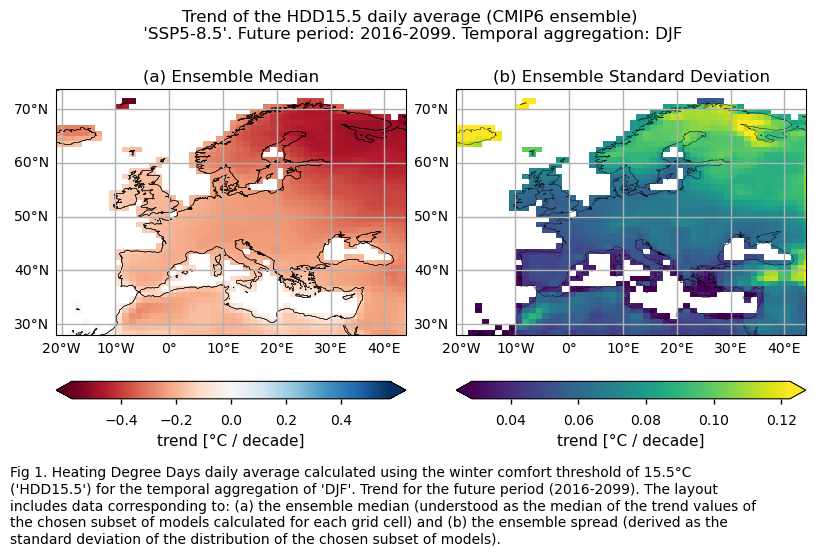

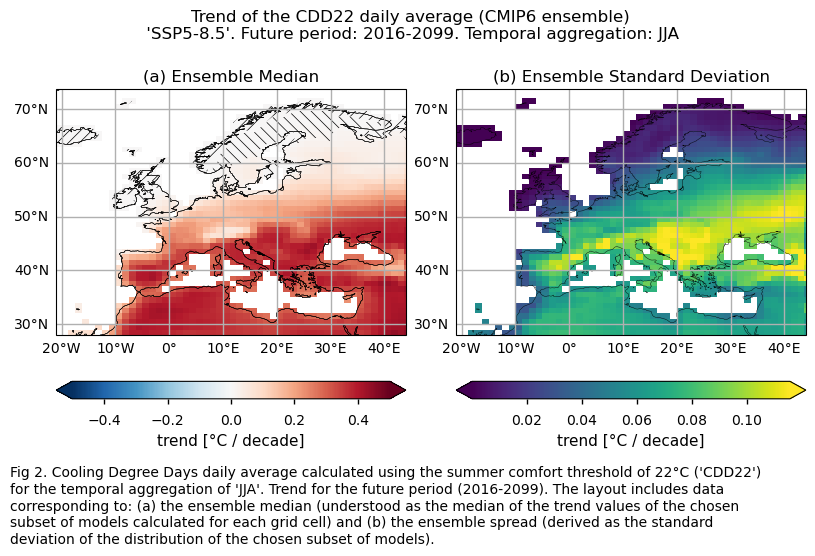

In [11]:
#Fig number counter
fig_number=1

#Common title
common_title = f"'SSP5-8.5'. Future period: {year_start}-{year_stop}. Temporal aggregation:"

for index in index_timeseries:
    # Trend
    da = ds_interpolated[index]
    da_trend = ds_interpolated["trend"].sel(index=index)
    da_trend.attrs["units"] = f"{da.attrs['units']} / decade"
    fig = plot_ensemble(
        da_models=da_trend,
        p_value_models=ds_interpolated["p"].sel(index=index),
        center=0,
        cmap=cmaps_trend.get(index),
        cmap_bias=cmaps_bias.get(index),
    )
    fig.suptitle(f"Trend of the {index} daily average ({collection_id} ensemble)\n {common_title} {index_timeseries[index]}",y=0.8)
    add_caption_ensemble(trend=True,exp="future",index=index)
    plt.show()
    fig_number=fig_number+1
    print(f"\n")


(climate_projections-cmip6_climate-impact-indicators_q02:section-3.3)=
#### 3.3. Plot model maps

In this section, we invoke the `plot_models()` function to visualise the trend calculated over the future period (2016-2099) for every model individually across Europe. Note that the model data used in this section maintains its original grid.

Specifically, for each of the indices ('HDD15.5' and 'CDD22'), this section presents a single layout including the trend for the future period (2016-2099) of every model.

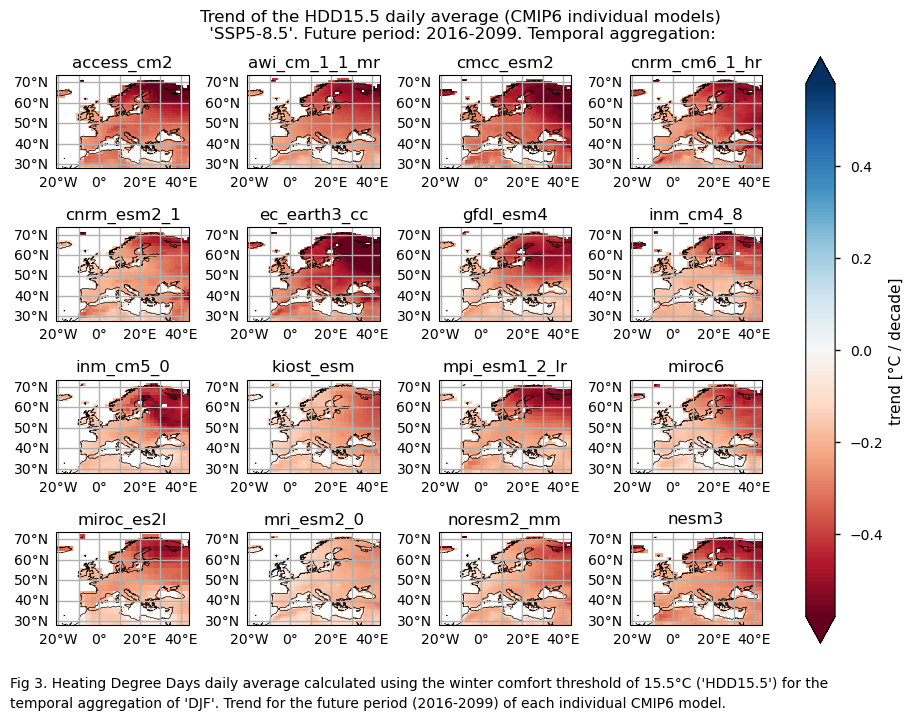

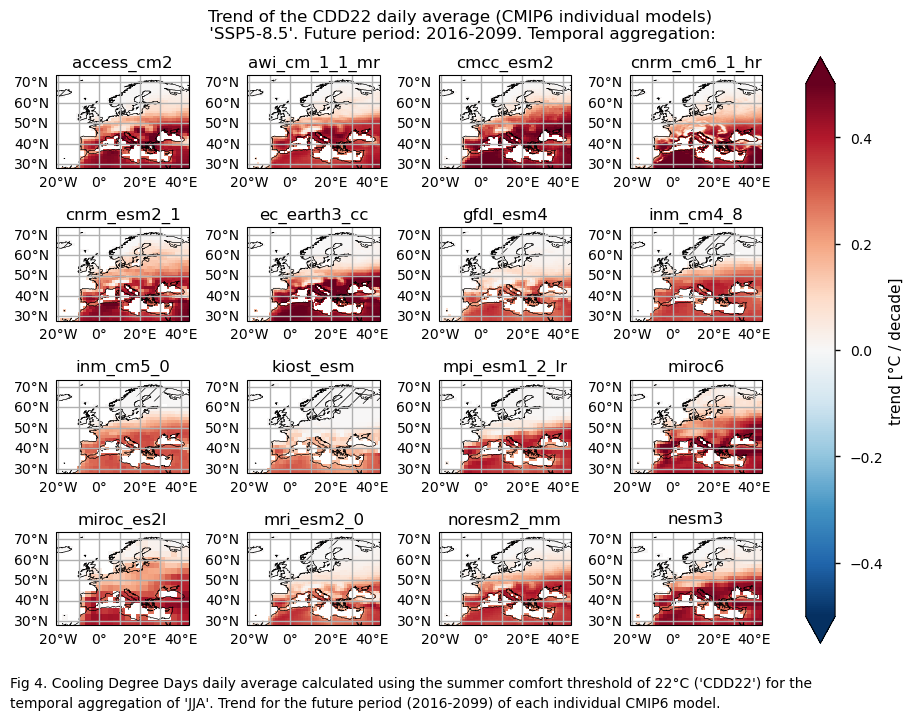

In [12]:
for index in index_timeseries:
    da_for_kwargs = ds_interpolated[index]
    # Trend
    da_for_kwargs_trends = ds_interpolated["trend"].sel(index=index)
    da_for_kwargs_trends.attrs["units"] = f"{da_for_kwargs.attrs['units']} / decade"
    fig = plot_models(
        data={
            model: ds["trend"].sel(index=index) for model, ds in model_datasets.items()
        },
        da_for_kwargs=da_for_kwargs_trends,
        p_values={
            model: ds["p"].sel(index=index) for model, ds in model_datasets.items()
        },
        center=0,
        figsize=[9,6.5],
        cmap=cmaps_trend.get(index),
    )
    fig.suptitle(f"Trend of the {index} daily average ({collection_id} individual models)\n {common_title}")
    add_caption_models(trend=True,exp="future",index=index)
    plt.show()
    print(f"\n")
    fig_number=fig_number+1

    

(climate_projections-cmip6_climate-impact-indicators_q02:section-3.4)=
#### 3.4. Boxplots of the future trend

Finally, we present boxplots representing the ensemble distribution of each climate model trend calculated over the future period (2016-2099) across Europe.

Dots represent the spatially-averaged future trend over the selected region (change of the number of days per decade) for each model (grey) and the ensemble mean (blue). The ensemble median is shown as a green line. Note that the spatially averaged values are calculated for each model from its original grid (i.e., no interpolated data has been used here).

The boxplot visually illustrates the distribution of trends among the climate models, with the box covering the first quartile (Q1 = 25th percentile) to the third quartile (Q3 = 75th percentile), and a green line indicating the ensemble median (Q2 = 50th percentile). Whiskers extend from the edges of the box to show the full data range.

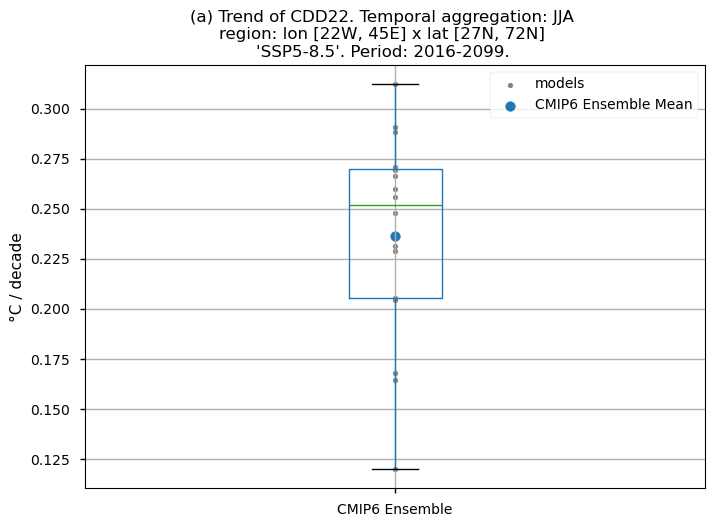

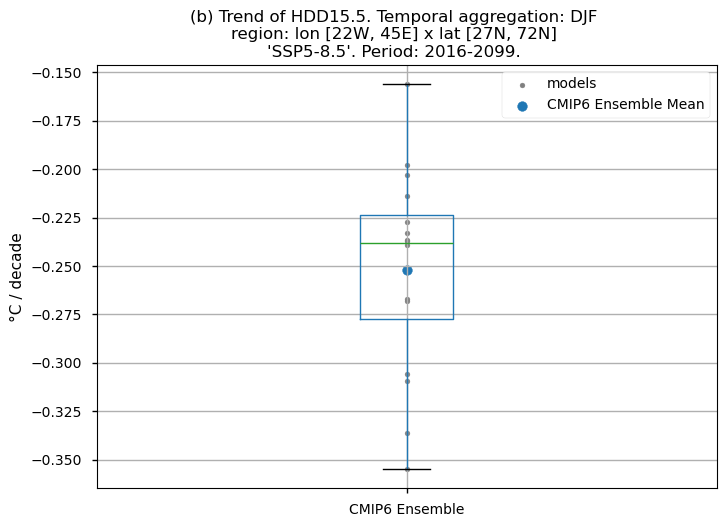

In [13]:
weights = collection_id == "CMIP6"
mean_datasets = [
    diagnostics.spatial_weighted_mean(ds.expand_dims(model=[model]), weights=weights)
    for model, ds in model_datasets.items()
]
mean_ds = xr.concat(mean_datasets, "model",coords='minimal',compat='override')
index_str=1
for index, da in mean_ds["trend"].groupby("index"):
    units = "°C / decade"  
    df_slope = da.to_dataframe()[["trend"]]
    ax = df_slope.boxplot()
    ax.scatter(
        x=[1] * len(df_slope),
        y=df_slope,
        color="grey",
        marker=".",
        label="models",
    )

    # Ensemble mean
    ax.scatter(
        x=1,
        y=da.mean("model"),
        marker="o",
        label=f"{collection_id} Ensemble Mean",
    )

    labels = [f"{collection_id} Ensemble"]
    ax.set_xticks(range(1, len(labels) + 1), labels)
    ax.set_ylabel(units)
    plt.suptitle(
            f"({chr(ord('`')+index_str)}) Trend of {index}. Temporal aggregation: {index_timeseries[index]} \n"
            f"region: lon [{-area[1]}W, {area[3]}E] x lat [{area[2]}N, {area[0]}N] \n"
            f"'SSP5-8.5'. Period: {year_start}-{year_stop}. "
        )  
    plt.legend()
    plt.show()
    index_str=index_str+1

<div>
    <div style="max-width: 800px;">
    <p><strong>Fig 5.</strong> Boxplots illustrating the future trends of the distribution of the chosen subset of models for the Energy Degree Days indices daily averaged: (a) 'CDD22', and (b) 'HDD15.5'. The distribution is created by considering spatially averaged trends across Europe. The ensemble mean and the ensemble median trends are both included. Outliers in the distribution are denoted by a grey circle with a black contour.<p>
    </div>

(climate_projections-cmip6_climate-impact-indicators_q02:section-3.5)=
#### 3.5. Results summary and discussion

- Trends calculated for the future period (2016-2099) exhibit a general decrease in Heating Degree Days (HDD15.5) across Europe for DJF, especially in the northern and central-eastern regions where winter Heating Degree Days are typically higher. For Cooling Degree Days (CDD22) trends calculated for summer in Europe, an increase can be observed, particularly in the southern half and central regions. However, no trend is observed for some northern regions and certain mountain areas, possibly due to the threshold temperature of 22°C being too high to be reached across these regions.

- The boxplots illustrate a decrease in Heating Degree Days (HDD15.5) across Europe for DJF during the future period from 2016 to 2099. The ensemble median trend reaches a daily average value near -0.23 °C per decade, which is a larger decrease than that captured by ERA5 for the historical period (around -0.15 °C per decade). The interquantile range of the ensemble ranges from -0.275 to around -0.225 °C per decade.

- The boxplot analysis reveals an increase in Cooling Degree Days (CDD22) across Europe for JJA, with an ensemble median trend value near 0.25 °C per decade and an interquantile range that spans approximately from 0.20 to 0.27 °C per decade. This increase is again larger than that reflected by the ERA5 calculations over the historical period (which is around 0.11°C/decade).

- What do the results mean for users? Are the biases relevant?

    - The projected decrease in Heating Degree Days during winter and the projected increase in Cooling Degree Days during summer provide valuable information for decisions sensitive to future energy demand. However, it is crucial to consider the biases identified during the historical period (1971-2000) in the assessment "CMIP6 Climate Projections: evaluating biases in energy-consumption-related indices in Europe". Depending on the region, these biases can either enhance or diminish confidence in interpreting the assessment results. The inter-model spread, which is used to account for projected uncertainties, should also be taken into account, as these uncertainties can lead to misinterpretations regarding the magnitude of projected increases or decreases.

<a id='RESULTS NOTE'></a>
<div class="alert alert-block alert-warning">  
<b>RESULTS NOTE</b>:<br> 
It is important to note that the results presented are specific to the 16 models chosen, and users should aim to assess as wide a range of models as possible before making a sub-selection.

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entries for the data used were:
* CMIP6 climate projections (Daily - air temperature): https://cds.climate.copernicus.eu/datasets/projections-cmip6?tab=overview


Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)
* [icclim](https://icclim.readthedocs.io/en/stable/) Python package
  
### References
[[1]](https://doi.org/10.1007/s10113-010-0173-x) Bindi, M., Olesen, J.E. The responses of agriculture in Europe to climate change (2011). Reg Environ Change 11 (Suppl 1), 151–158. https://doi.org/10.1007/s10113-010-0173-x

[[2]](https://doi.org/10.1016/j.foreco.2009.09.023) Lindner, M., Maroschek, M., Netherer, S., Kremer, A., Barbati, A., Garcia-Gonzalo, J., Seidi, R., Delzon, S., Corona, P., Kolstrom, M., Lexer, M.J., Marchetti, M. (2010). Climate change impacts, adaptive capacity, and vulnerability of European forest ecosystems. For. Ecol. Manage. 259(4): 698–709. https://doi.org/10.1016/j.foreco.2009.09.023 

[[3]](https://doi.org/10.1016/j.enbuild.2014.09.052) Santamouris, M., Cartalis, C., Synnefa, A., Kolokotsa, D. (2015). On the impact of urban heat island and global warming on the power demand and electricity consumption of buildings – a review. Energy Build. 98: 119–124. https://doi.org/10.1016/j.enbuild.2014.09.052

[[4]](https://doi.org/10.1007/s10113-013-0499-2) Jacob, D., Petersen, J., Eggert, B. et al. (2014). EURO-CORDEX: new high-resolution climate change projections for European impact research. Reg Environ Change 14, 563–578. https://doi.org/10.1007/s10113-013-0499-2

[[5]](http://hdl.handle.net/10013/epic.45156.d001) IPCC. 2014. In Climate Change 2014: Synthesis Report. Contribution of Working Groups I, II and III to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change, Core Writing Team, RK Pachauri, LA Meyer (eds). IPCC: Geneva, Switzerland 151 pp.

[[6]](https://doi.org/10.1002/joc.5362) Spinoni, J., Vogt, J.V., Barbosa, P., Dosio, A., McCormick, N., Bigano, A. and Füssel, H.-M. (2018). Changes of heating and cooling degree-days in Europe from 1981 to 2100. Int. J. Climatol, 38: e191-e208. https://doi.org/10.1002/joc.5362

[[7]](https://doi.org/10.1038/s43247-023-00878-3) Scoccimarro, E., Cattaneo, O., Gualdi, S. et al. (2023). Country-level energy demand for cooling has increased over the past two decades. Commun Earth Environ 4, 208. https://doi.org/10.1038/s43247-023-00878-3